# Getting data from nike.com
---

In [ ]:
# Modules import
import pandas as pd
import requests as req
import json
import re

# Product page
uri = 'https://www.nike.com/w/mens-shoes-nik1zy7ok'
url = 'https://www.nike.com/gb/launch?s=upcoming'
base_url = 'https://api.nike.com'
session = req.Session()


# A function for retrieving lazily loaded products
def get_lazy_products(stub, products):
    response = session.get(base_url + stub).json()
    next_products = response['pages']['next']
    products += response['objects']
    if next_products:
        get_lazy_products(next_products, products)
    return products


# find INITIAL_REDUX_STATE
html_data = session.get(uri).text
redux = json.loads(
    re.search(r'window.INITIAL_REDUX_STATE=(\{.*?\});', html_data).group(1))

# find the initial products and the api entry point for the recursive loading of additional products
wall = redux['Wall']
initial_products = re.sub('anchor=[0-9]+', 'anchor=0',
                          wall['pageData']['next'])

# find all the products
products = get_lazy_products(initial_products, [])

# Optional: filter by id to get a list with unique products
cloudProductIds = set()
unique_products = []
for product in products:
    try:
        if not product['id'] in cloudProductIds:
            cloudProductIds.add(product['id'])
            unique_products.append(product)
    except KeyError:
        print(product)

## Trying out another method

In [18]:
# Importing modules
import lxml
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import html

In [157]:
url = "https://www.nike.com/gb/launch?s=upcoming"

In [158]:
#Getting the html page of the website using requests.get(url) framework
webpage = get(url)

In [159]:
#Parsing data from the html page
soup = BeautifulSoup(webpage.content, 'lxml')

Air Force 1 'Purple Skeleton'
https://www.nike.com/gb/launch/t/air-force-1-purple-skeleton
Oct
28


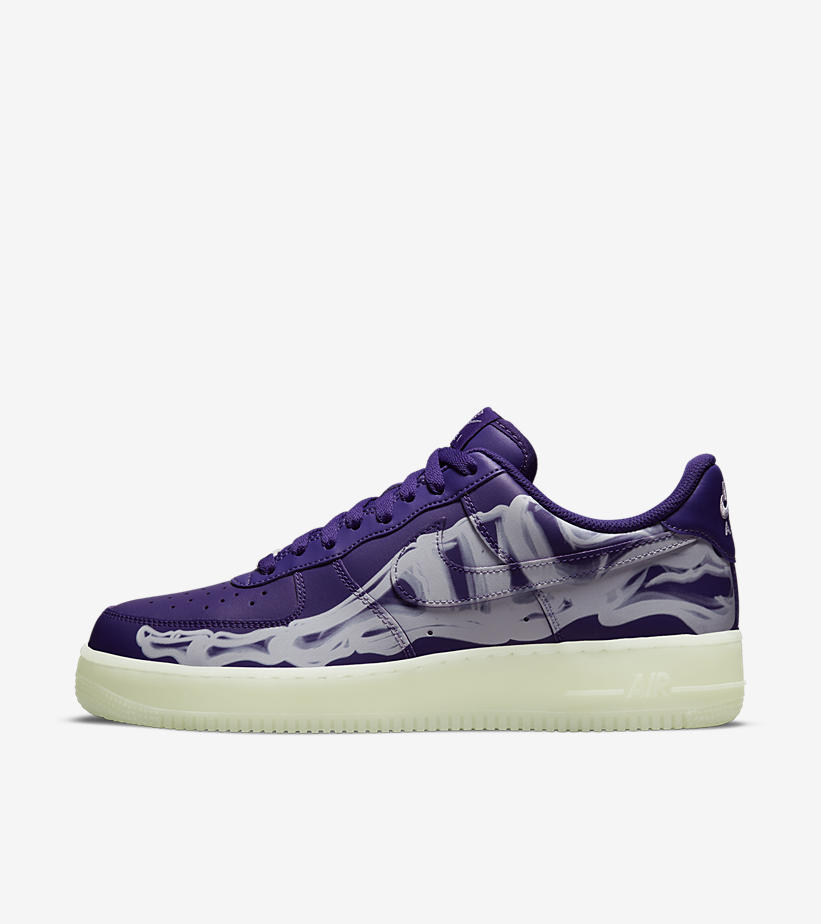

SB Dunk Low 'Mummy'
https://www.nike.com/gb/launch/t/sb-dunk-low-mummy
Oct
28


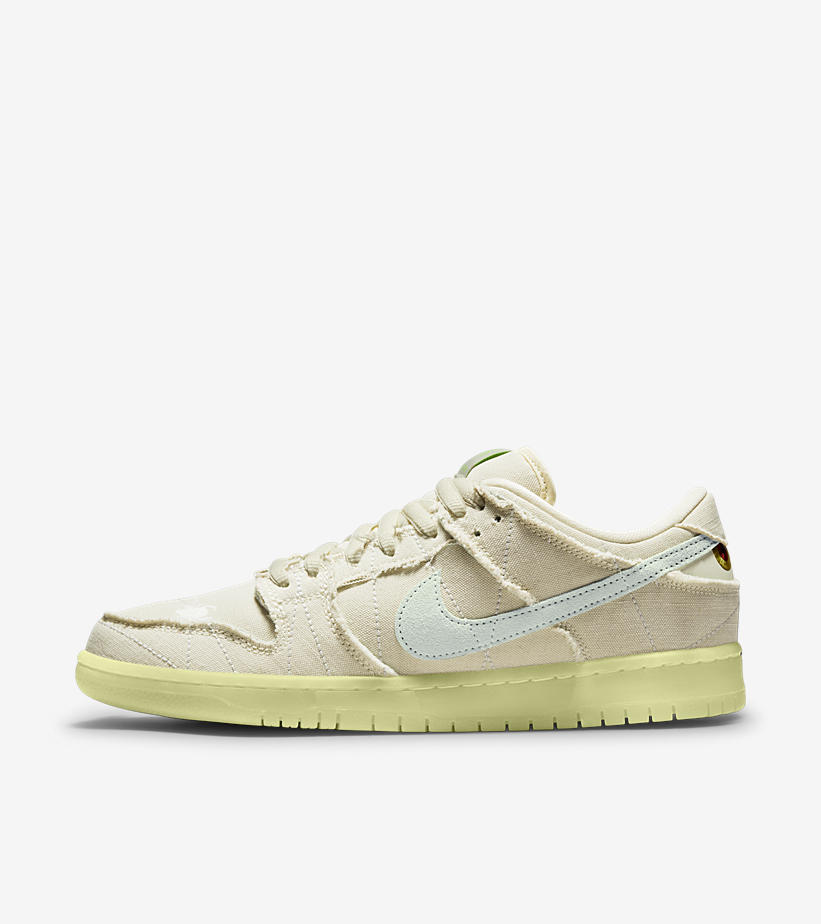

LDWaffle x sacai x UNDERCOVER 'Black and Bright Citron'
https://www.nike.com/gb/launch/t/ldwaffle-sacai-undercover-black-bright-citron
Oct
29


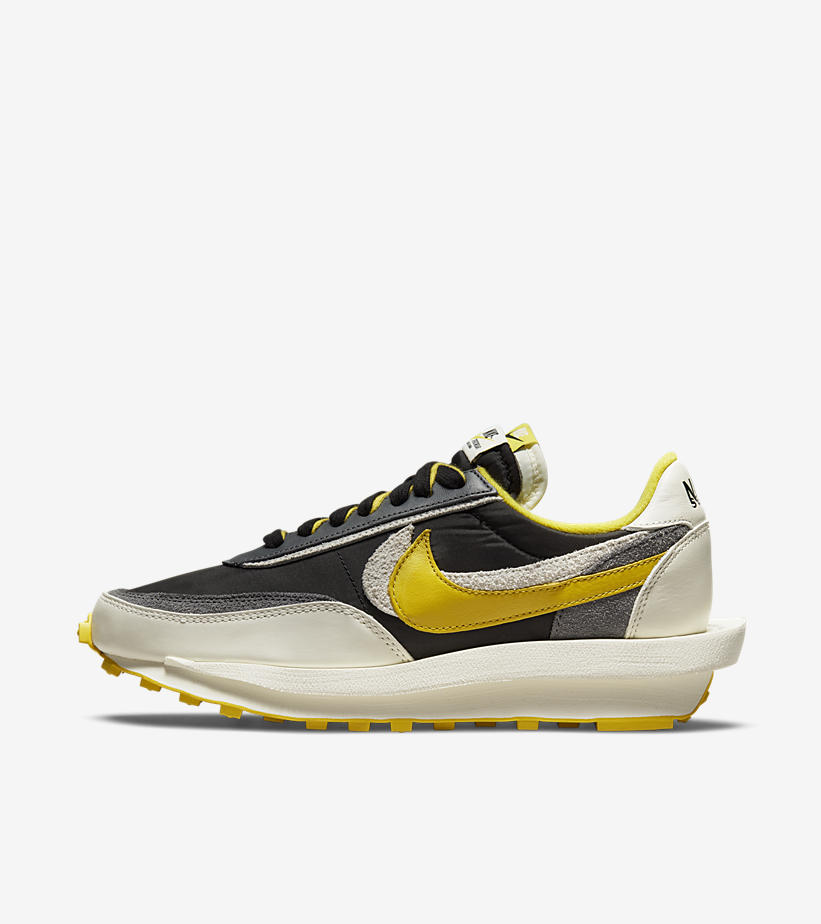

LDWaffle x sacai x UNDERCOVER 'Night Maroon and Team Royal'
https://www.nike.com/gb/launch/t/ldwaffle-sacai-undercover-night-maroon-team-royal
Oct
29


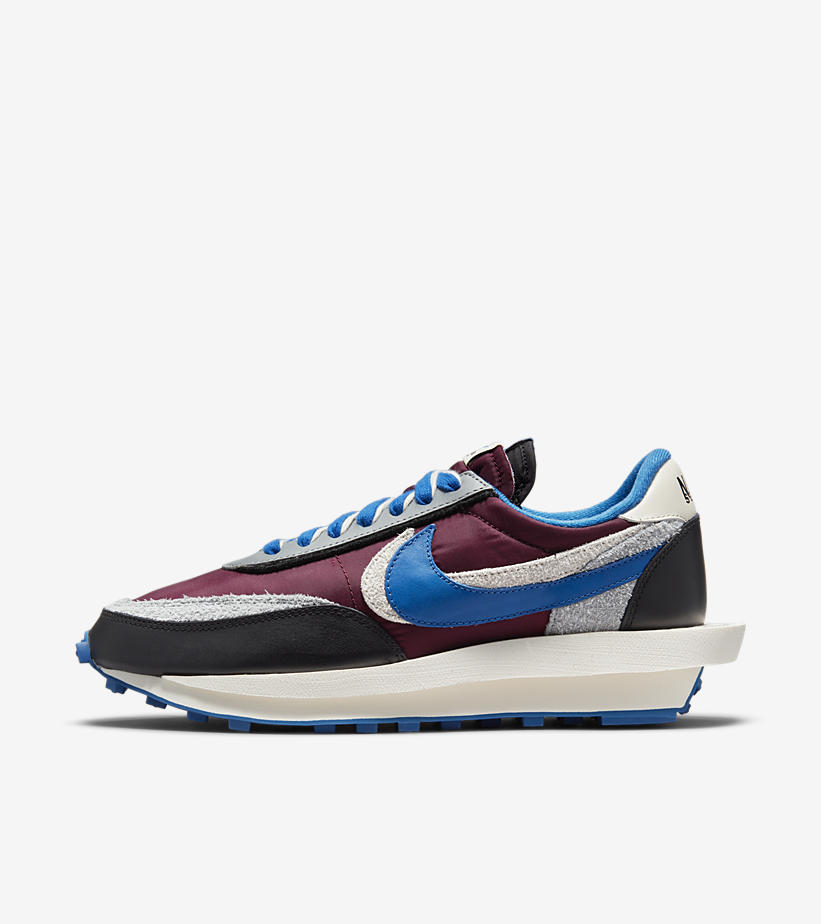

LDWaffle x sacai x UNDERCOVER 'Midnight Spruce and University Red'
https://www.nike.com/gb/launch/t/ldwaffle-sacai-undercover-midnight-spruce-university-red
Oct
29


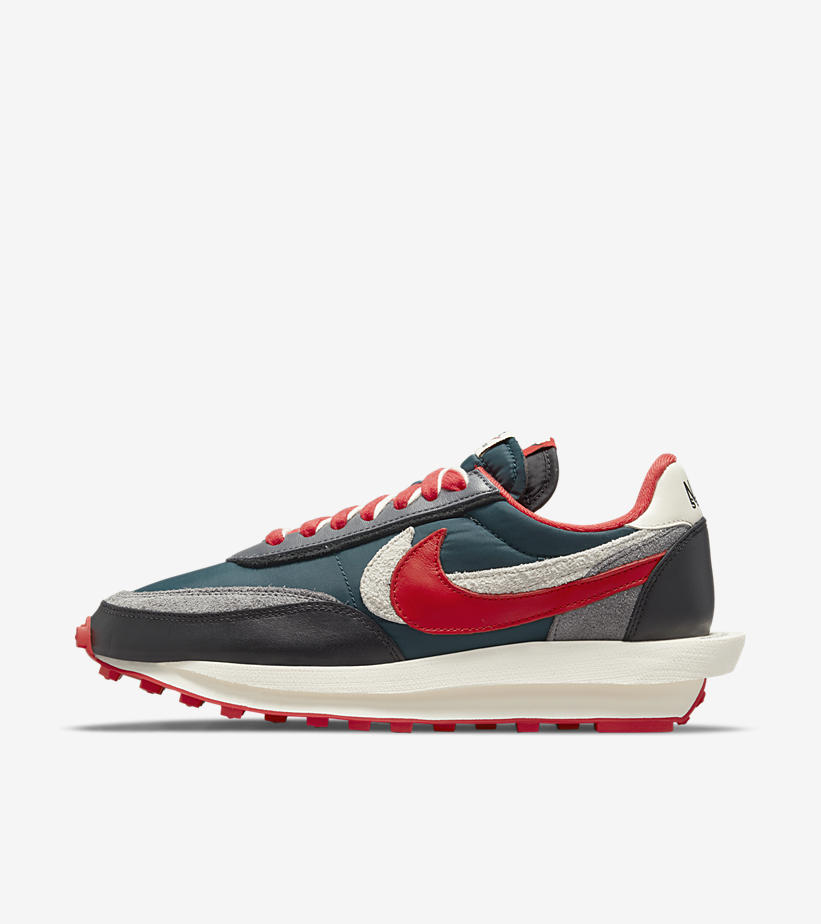

Air Jordan 3 'Pine Green'
https://www.nike.com/gb/launch/t/air-jordan-3-pine-green-emea
Oct
30


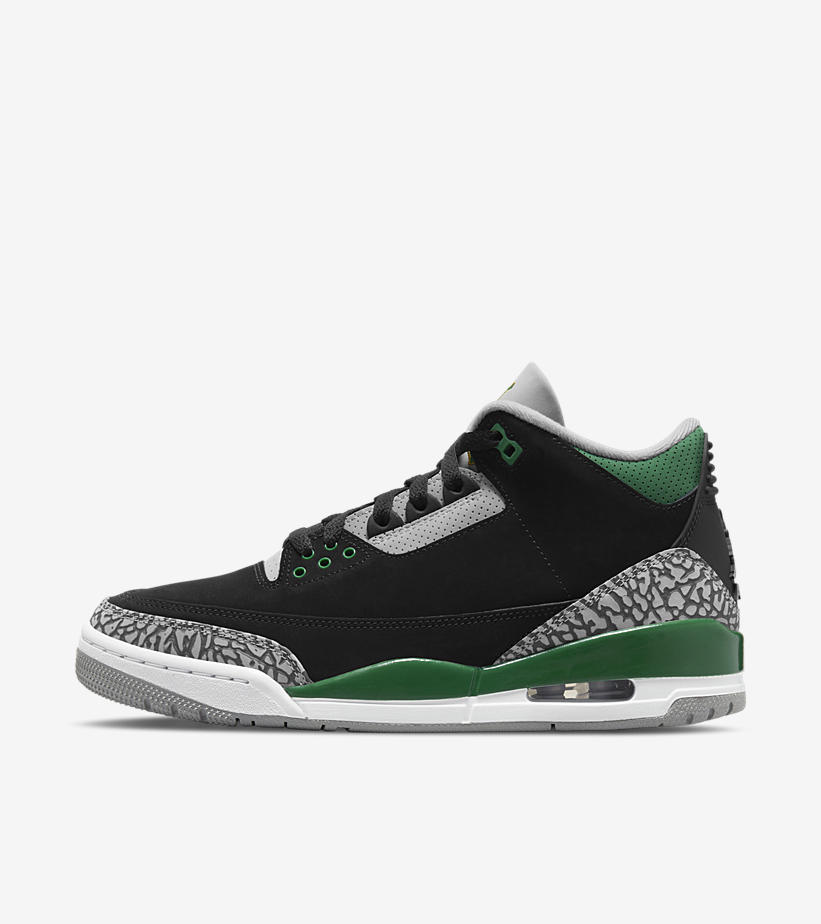

Women's Air Force 1 'Pecan Quilt'
https://www.nike.com/gb/launch/t/womens-air-force-1-pecan-quilt
Nov
5


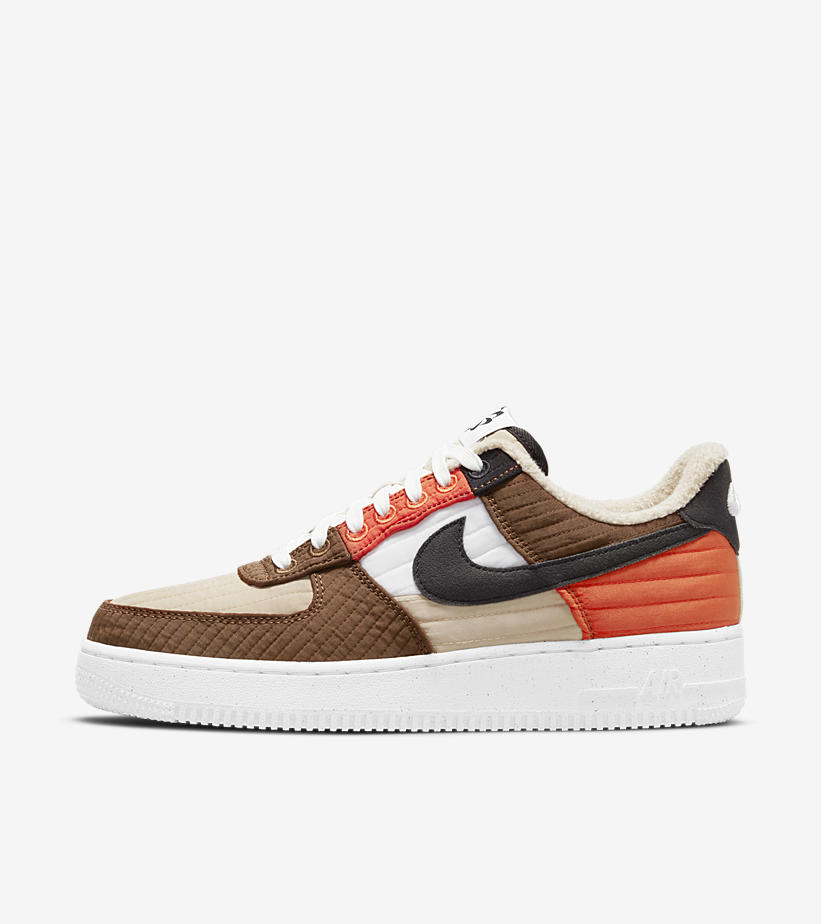

Women's Dunk High 'Next Nature Summit White'
https://www.nike.com/gb/launch/t/womens-dunk-high-next-nature-summit-white
Nov
5


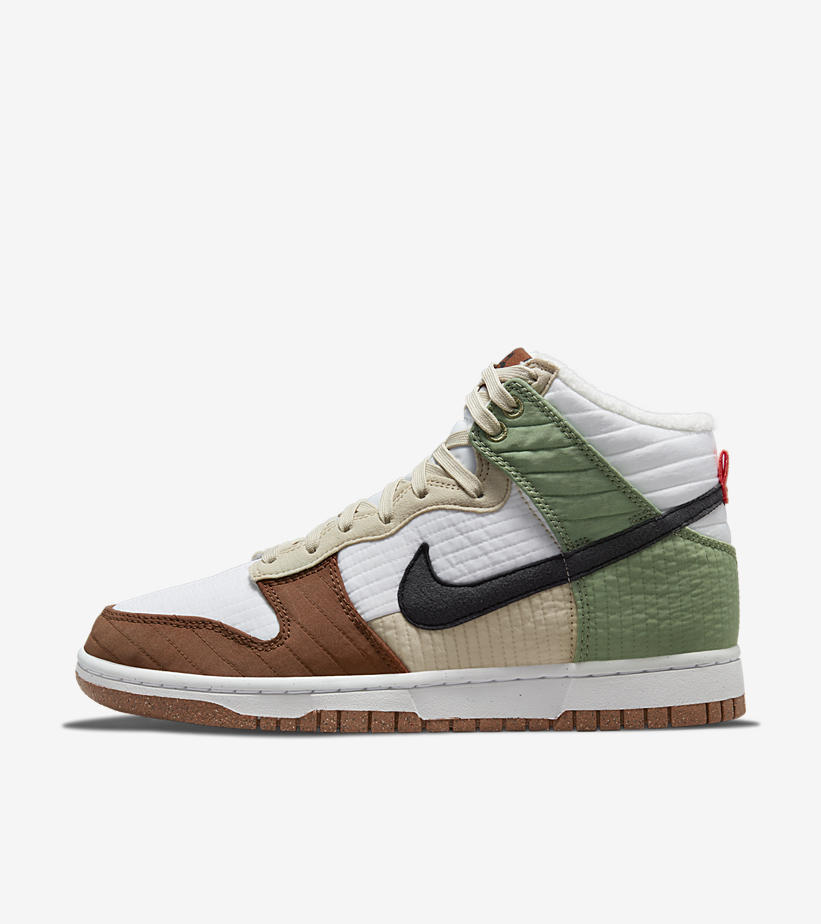

In [205]:
url_start = "https://www.nike.com"
image_url_start = "https://secure-images.nike.com/is/image/DotCom/"
image_url_end = "_A_PREM?$SNKRS_COVER_WD$&align=0,1"
for i in sh_rl:
    product_start_line = i.find('a')['aria-label']
    try:
        product_name = product_start_line.rsplit(" ", 3)[0]
        print(product_name)
    except:
        print('null')
    try:
        shoe_url = url_start + i.find('a').get('href')
        print(shoe_url)
    except:
        print('null')
    try:
        shoe_month = i.find('p', class_="headline-4").text
        print(shoe_month)
    except:
        print('null')
    try:
        shoe_day = i.find('p', class_="headline-1").text
        print(shoe_day)
    except:
        print('null')
    try:
        shoe_code = product_start_line.split('(', 1)[1].split(')')[0]
        shoe_code = shoe_code.replace('-', '_')
        snkr_image_url = image_url_start + shoe_code + image_url_end
        snkr_image = urllib.request.urlretrieve(snkr_image_url, "./"+shoe_code+".jpg")
        pil_img = Image(filename='./'+shoe_code+'.jpg', width = 200, height = 200)
        display(pil_img)
    except:
        print('null')

In [121]:
#Getting the element or tag that holds the movie content
content = soup.find(class_="ncss-container feed-container-inner")

In [84]:
shoes = content.find_all("div", class_ = "product-card ncss-row mr0-sm ml0-sm")

In [85]:
type(content)

bs4.element.Tag

In [86]:
type(shoes)

bs4.element.ResultSet

In [167]:
sh_nm = content.find('a')['aria-label']

In [169]:
sh_nm

"Air Force 1 'Purple Skeleton' (CU8067-500) Release Date"

In [175]:
sh_n = "Air Force 1 'Purple Skeleton' [CU8067-500] Release Date"

In [180]:
sh_nm.split('(', 1)[1].split(')')[0]

'CU8067-500'

In [168]:
sh_nm.rsplit(" ", 3)[0]

"Air Force 1 'Purple Skeleton'"

In [116]:
text = "Women's Dunk High 'Next Nature Summit White' (DN9909-100) Release Date"

In [115]:
text.rsplit(" ", 3)[0]

"LDWaffle x sacai x UNDERCOVER 'Black and Bright Citron'"

In [118]:
ch_text = text.rsplit(" ", 3)[0]
type(ch_text)

str

In [6]:
content

<section class="upcoming-section bg-white ncss-row prl2-md prl5-lg pb4-md pb6-lg" data-qa="upcoming-section"><figure class="pb2-sm va-sm-t ncss-col-sm-12 ncss-col-md-6 ncss-col-lg-4 pb4-md prl0-sm prl2-md ncss-col-sm-6 ncss-col-lg-3 pb4-md prl2-md pl0-md pr1-md d-sm-h d-md-ib"><div class="product-card ncss-row mr0-sm ml0-sm" data-qa="product-card-0"><div class="ncss-col-sm-12 full"><a aria-label="Air Force 1 'Purple Skeleton' (CU8067-500) Release Date" class="card-link d-sm-b" data-qa="product-card-link" href="/gb/launch/t/air-force-1-purple-skeleton"><div class="launch-time ta-sm-l d-sm-h d-md-b z10 mod-bg-grey pt6-sm pl6-sm"><div class="launch-caption ta-sm-c"><p class="headline-4" data-qa="test-startDate">Oct</p><p class="headline-1" data-qa="test-day">28</p></div></div><div style="position:absolute;top:0;right:0;bottom:0;left:0"></div></a><figcaption class="ncss-row"><div class="ncss-col-sm-12 full"><div class="figcaption-content"><div class="copy-container ta-sm-c bg-white pt6-sm 

In [153]:
# Creating a class to extract data from the SNKRS webpage
class SNKRS:
    '''Creating a docstring for the webpage for SNKRS'''
    def __init__(self, url):
        self.soup = self.soup_gen(url)
        self.url_start = "https://www.nike.com"
        self.url_end = ""

    def soup_gen(self, url):
        snkrs_webpage = get(url)
        soup = BeautifulSoup(webpage.content, 'lxml')
        return soup

    def feed_content(self):
        content = soup.find(class_="ncss-container feed-container-inner")
        return content.find_all("div", class_ = "product-card ncss-row mr0-sm ml0-sm")
    
    def product_content(self):
        product_container = self.feed_content()
        product_title = []
        release_month = []
        release_day = []
        product_photos = []
        product_link = []
        
        for snkr_release in product_container:
            product_start_line = snkr_release.find('a')['aria-label']
            try:
                product_name = product_start_line.rsplit(" ", 3)[0]
                product_title.append(product_name)
                print(product_name)
            except:
                product_name.append(np.nan)
            try:
                shoe_url = self.url_start + snkr_release.find('a').get('href')
                print(shoe_url)
                product_link.append(shoe_url)
            except:
                product_link.append(np.nan)
            try:
                release_month.append(snkr_release.find('p', class_="headline-4").text)
            except:
                release_month.append(np.nan)
            try:
                release_day.append(snkr_release.find('p', class_="headline-1").text)
            except:
                release_day.append(np.nan)

In [67]:
content.find_all("div", class_ = "product-card ncss-row mr0-sm ml0-sm")

[<div class="product-card ncss-row mr0-sm ml0-sm" data-qa="product-card-0"><div class="ncss-col-sm-12 full"><a aria-label="Air Force 1 'Purple Skeleton' (CU8067-500) Release Date" class="card-link d-sm-b" data-qa="product-card-link" href="/gb/launch/t/air-force-1-purple-skeleton"><div class="launch-time ta-sm-l d-sm-h d-md-b z10 mod-bg-grey pt6-sm pl6-sm"><div class="launch-caption ta-sm-c"><p class="headline-4" data-qa="test-startDate">Oct</p><p class="headline-1" data-qa="test-day">28</p></div></div><div style="position:absolute;top:0;right:0;bottom:0;left:0"></div></a><figcaption class="ncss-row"><div class="ncss-col-sm-12 full"><div class="figcaption-content"><div class="copy-container ta-sm-c bg-white pt6-sm pb7-sm pb7-lg"><h3 class="headline-5">Air Force 1<!-- --> </h3><h6 class="headline-3">Purple Skeleton<!-- --> </h6></div><div class="cta-container bg-white pt6-sm pb7-sm prl12-sm pb8-sm pt8-lg ta-sm-c" data-qa="shop-now-cta"><img alt="loading" class="image-component d-sm-ib" d